### 1.import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# 2.Import Data 

In [2]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# 3.Data Understanding

## 3.1 initial Analysis 

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

## 3.2 Perfrom Assumption Check

### A.Linearity Test

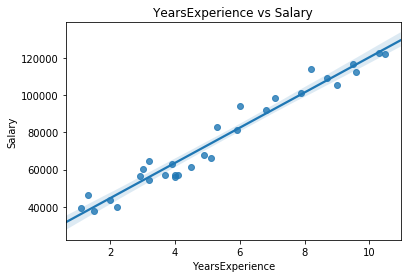

In [6]:
sns.regplot(x='YearsExperience', y='Salary',data=salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

In [7]:
# From the above Linearity Test is Failed.

### B.Normality Test

In [8]:
#For this we can use Histogram,Displot,Box plot

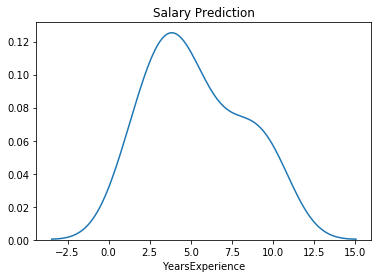

In [9]:
sns.distplot(a= salary_data['YearsExperience'],hist=False)
plt.title('Salary Prediction')
plt.show()

In [10]:
# So,Here Normality Test is failed hence,slopes and intercepts will be impackted.


### C.No Multicollineraity 
#Because it is having only one input Feature

### D.No Autoregression 
we don't have input features with date,time data type.

### E. Homoscadasticity Check || F.Zero Residual Mean

#These test can be performed only after Model Training

# 4. Feature Engineering 

In [11]:
#  Sometimes the datasets are not normally distributed and in such circumstances
#  ,for the normal functioning of various statistical and other machine learning algorithms,
# feature transformation is performed to normalize the data.
# The common application of them is when dealing with predictive models such as Linear Regression 
# where we need to normalize the data if the data is otherwise.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BFADEF0>]],
      dtype=object)

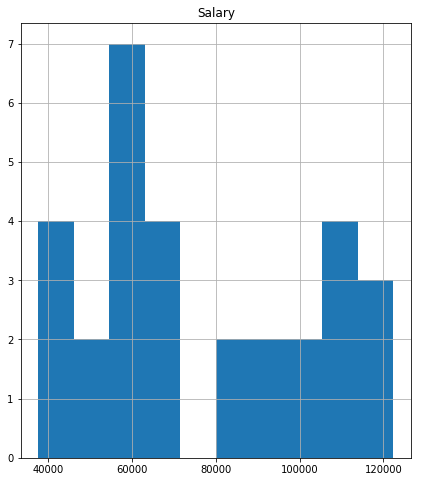

In [19]:
salary_data.hist(column='Salary',figsize=(7,8))

In [13]:
#it is evident how skewed the data is. We can now apply various transformation and see how it affects the skewness of the data.

### Calculate Skewness

In [14]:
salary_data['Salary'].skew()

0.35411967922959153

In [15]:
#We find that the skewness comes out to be 0.35411967922959153 which indicates that the data is somewhat positive (Right) Skewed and slightly away from 0 (Normal). 
# Hence we are using log Transformation to reduce skewness & to normalize the data.

### Log Transformation

In [23]:
salary_data['log_Salary']=np.log(salary_data['Salary'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7FCD30>]],
      dtype=object)

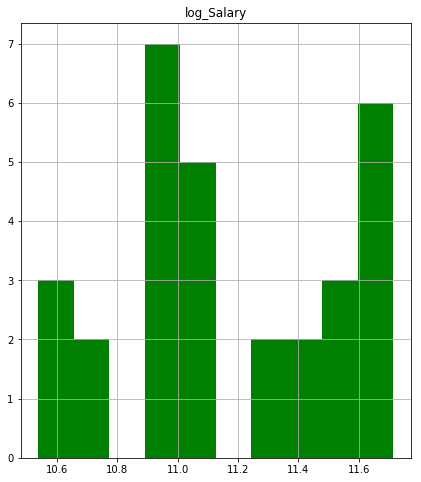

In [42]:
salary_data.hist(column='log_Salary',figsize=(7,8),color='green')

In [25]:
salary_data['log_Salary'].skew()

-0.044126086756988495

In [26]:
# The Transformation causes the distribution to become slightly Negatively (Left) Skewed, however, the output (variable’s distribution) is much more close to 0 than what it was when the variable wasn’t transformed. 

### Square-Root Transformation

In [27]:
salary_data['sqrttransform_Salary']=np.sqrt(salary_data['Salary'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B9FF7F0>]],
      dtype=object)

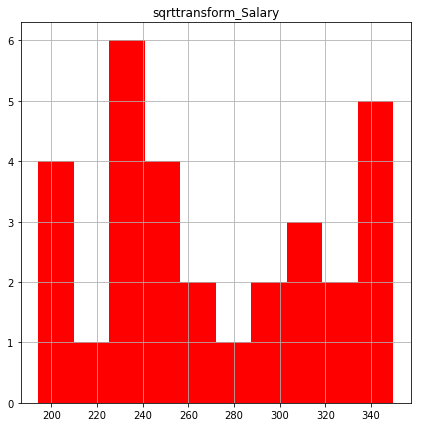

In [28]:
salary_data.hist(column='sqrttransform_Salary',figsize=(7,7),color='red')

In [29]:
salary_data['sqrttransform_Salary'].skew()

0.16904336802767353

# 4. Data understanding (To remove unnecessary columns,null entries.Also,data type should be in integer)

In [30]:
salary_data.head()

,YearsExperience,Salary,log_Salary,sqrttransform_Salary
0,1.1,39343.0,10.580073,198.350700
1,1.3,46205.0,10.740843,214.953483
2,1.5,37731.0,10.538237,194.244691
3,2.0,43525.0,10.681091,208.626460
4,2.2,39891.0,10.593906,199.727314


In [31]:
salary_data.dtypes

YearsExperience         float64
Salary                  float64
log_Salary              float64
sqrttransform_Salary    float64
dtype: object

In [13]:
salary_data.isna()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# 5.Model Building || 6.Model Training (Seperating i/p & o/p means model building)

In [32]:
# Note: Linear regression can be build up by Two Libraries
# 1.Stats Model 
# 2.SKL Libraries

### I Used Stat Models to build my Model 

In [33]:
import statsmodels.formula.api as Smf

In [34]:
Linear_model=Smf.ols(formula='Salary~YearsExperience', data=salary_data).fit()
Linear_model

In [35]:
Linear_model.params    #To get Slopes & Intercept values

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [36]:
# Finding Pvalues and tvalues
Linear_model.tvalues,Linear_model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

# 7.Model Testing 

In [37]:
salary_data.head()

,YearsExperience,Salary,log_Salary,sqrttransform_Salary
0,1.1,39343.0,10.580073,198.350700
1,1.3,46205.0,10.740843,214.953483
2,1.5,37731.0,10.538237,194.244691
3,2.0,43525.0,10.681091,208.626460
4,2.2,39891.0,10.593906,199.727314


In [38]:
Linear_model.predict # i have to pass a question tp train my model

<bound method OLSResults.predict of <statsmodels.regression.linear_model.OLSResults object at 0x000000000D71E208>>

In [39]:
Salary_hike=pd.Series([5,6,7])
Salary_hike

0    5
1    6
2    7
dtype: int64

### Firstly,i am creating my own Data frame for testing purpose

In [40]:
X_test=pd.DataFrame(Salary_hike,columns=['YearsExperience'])
X_test

,YearsExperience
0,5
1,6
2,7


In [41]:
Linear_model.predict(X_test)

0    73042.011806
1    82491.974127
2    91941.936449
dtype: float64

## Hence,from above we can predict salary on 5,6,7 years of experience. 